Neural networks and Autoencoders

In [1]:
import open3d as o3d
import numpy as np
import os
import glob
import pandas as pd
import pymeshlab as pml
import time
import matplotlib as plt
import sys
sys.path.append('../preprocessing')
from viz import viz_mesh

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

import pandas as pd
df = pd.read_pickle("../querying/normalized_features_final.pkl")
k = 10
npdata = df[df.columns[2:9]].to_numpy()
for col in df.columns[9:]:
    npcol = df[col].to_numpy()
    npdata = np.hstack((npdata,np.array([a for a in npcol])))
labels = df["class"].to_numpy()


features_total = npdata
paths = (df["path"].str.replace("./features","../resampledPML") + ".obj").to_numpy()

In [3]:
import pickle as pkl
with open("./paths.pkl", 'rb') as file:
    path = pkl.load(file)
true_classes = [p.split("/")[-1].split("\\")[0] for p in path]
objnames = [p.split("/")[-1].split("\\")[1] for p in path]
true_classes, objnames

(['AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'AircraftBuoyant',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'Apartment',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnimal',
  'AquaticAnima

In [4]:
with open("./normalized_features_final_with_silhouettes.pkl", 'rb') as file:
    newdf = pkl.load(file)

In [5]:
features_np = newdf.to_numpy()
features_np.shape

(2466, 1038)

In [6]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

labels_one_hot = to_categorical(labels_encoded)

# Split the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(npdata, labels_one_hot, test_size=0.2,  random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5,  random_state=42)
indices = np.arange(len(npdata))

# Use train_test_split with 'indices' to split your data while maintaining index correspondence
indices_train, indices_test = train_test_split(indices, test_size=0.2, random_state=42)
indices_test, indices_val = train_test_split(indices_test, test_size=0.5, random_state=42)

import tensorflow as tf

X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

np.argmax(X_train)
history = model.fit(X_train, y_train, epochs=30, batch_size=48, validation_data=(X_val, y_val))


Epoch 1/30
42/42 [==============================] - 3s 21ms/step - loss: 3.9592 - accuracy: 0.1141 - val_loss: 3.6608 - val_accuracy: 0.1048
Epoch 2/30
42/42 [==============================] - 0s 11ms/step - loss: 3.3431 - accuracy: 0.1768 - val_loss: 3.2993 - val_accuracy: 0.1371
Epoch 3/30
42/42 [==============================] - 2s 48ms/step - loss: 2.9723 - accuracy: 0.2258 - val_loss: 3.0385 - val_accuracy: 0.2056
Epoch 4/30
42/42 [==============================] - 1s 14ms/step - loss: 2.7258 - accuracy: 0.2667 - val_loss: 2.9116 - val_accuracy: 0.2379
Epoch 5/30
42/42 [==============================] - 0s 6ms/step - loss: 2.5400 - accuracy: 0.3045 - val_loss: 2.7533 - val_accuracy: 0.2621
Epoch 6/30
42/42 [==============================] - 0s 8ms/step - loss: 2.3974 - accuracy: 0.3258 - val_loss: 2.6574 - val_accuracy: 0.2823
Epoch 7/30
42/42 [==============================] - 0s 10ms/step - loss: 2.3321 - accuracy: 0.3364 - val_loss: 2.5955 - val_accuracy: 0.3145
Epoch 8/30
42/4

In [7]:
model.evaluate(X_test,y_test)

1/8 [==>...........................] - ETA: 0s - loss: 2.9554 - accuracy: 0.4062

8/8 [==============================] - 0s 3ms/step - loss: 2.3285 - accuracy: 0.4332


[2.328545570373535, 0.43319839239120483]

In [8]:
cnn_df = pd.read_pickle("../feature-extraction/df_CNN.pkl")

In [9]:
import numpy as np

# Assuming you have a list of arrays with the desired shape
data_list = [np.stack((row["XY"].astype(int), row["XZ"].astype(int), row["YZ"].astype(int)), axis=-1) for _, row in cnn_df.iterrows()]

# Convert the list of arrays to a NumPy array
final_data = np.array(data_list)

# Verify the shape of final_data
print(final_data.shape)  # Should be (2400, 100, 100, 3)

(2467, 100, 100, 3)


In [10]:
X = np.asarray(final_data).astype('float32')
y = cnn_df['Class Name']

In [11]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)

# Now, you can one-hot encode the integer labels
labels_one_hot = to_categorical(labels_encoded)


X_train, X_test, y_train, y_test = train_test_split(X, labels_one_hot, test_size=0.2,  random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5,  random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(scalar_features, labels_one_hot, test_size=0.2, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
indices = np.arange(len(X))

# Use train_test_split with 'indices' to split your data while maintaining index correspondence
indices_train, indices_test = train_test_split(indices, test_size=0.2, random_state=42)
indices_test, indices_val = train_test_split(indices_test, test_size=0.5, random_state=42)

In [12]:
X.shape

(2467, 100, 100, 3)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
class AutoEncDNN(Model):
  def __init__(self):
    super(AutoEncDNN, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(1038)),
      layers.Dense(128),
      layers.Dense(256),
      layers.Dense(256),
      layers.Dense(128),
      layers.Dense(30)
      ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(128),
      layers.Dense(256),
      layers.Dense(256),
      layers.Dense(128),
      layers.Dense(1038)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoderDNN = AutoEncDNN()
autoencoderDNN.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [14]:
autoencoderDNN.fit(features_np, features_np,
                epochs=10,
                shuffle=True, batch_size=32,            
                )

Epoch 1/10


78/78 [==============================] - 3s 18ms/step - loss: 0.0108
Epoch 2/10
78/78 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 3/10
78/78 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 4/10
78/78 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 5/10
78/78 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 6/10
78/78 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 7/10
78/78 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 8/10
78/78 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/10
78/78 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 10/10
78/78 [==============================] - 0s 6ms/step - loss: 0.0012


In [15]:
totalpreds = autoencoderDNN.encoder.predict(features_np)
distances = []
for index in range(len(totalpreds)):
    # index = 845
    query_object = totalpreds[index]
    # print("True label: ", true_classes[index])
    # Calculate distances using Euclidean distance as an example
    # distances.append(np.linalg.norm(totalpreds - query_object, axis=1))
    # from scipy.spatial.distance import cosine
    # distances.append(np.array([cosine(pred, query_object) for pred in totalpreds]))
    distances.append(np.sum(np.abs(totalpreds - query_object), axis=1))

78/78 [==============================] - 0s 2ms/step


In [16]:
distancesnp = np.array(distances)
import numpy as np
topk = 10
# Assuming distancesnp is your numpy array
# Set the diagonal elements to infinity as they are 0 (distance of an element to itself)
# np.fill_diagonal(distancesnp, np.inf)

# Get the indices of the smallest 10 elements in each row
indices = np.argpartition(distancesnp, topk+1, axis=1)[:, :topk+1]
smallest_distances = np.partition(distancesnp, topk+1, axis=1)[:, :topk+1]
# Sort the indices by corresponding distances
indices_sorted_by_distance = np.array([row[indices[i].argsort()] for i, row in enumerate(distancesnp)])
sorted_indices = np.array([idx_row[dist_row.argsort()] for idx_row, dist_row in zip(indices, smallest_distances)])
# Get the smallest 10 elements in each row and sort them
smallest_distances_sorted = np.sort(np.partition(distancesnp, topk+1, axis=1)[:, :topk+1])
smallest_distances_sorted

array([[0.        , 2.3169374 , 6.833821  , ..., 7.793116  , 7.9633136 ,
        8.002292  ],
       [0.        , 2.3169374 , 7.5000963 , ..., 8.955303  , 9.023538  ,
        9.127623  ],
       [0.        , 5.313182  , 5.590906  , ..., 6.3312397 , 6.3501496 ,
        6.351153  ],
       ...,
       [0.        , 2.6314409 , 2.644848  , ..., 4.549974  , 5.0459695 ,
        5.130616  ],
       [0.        , 0.05497471, 0.15708539, ..., 4.3412223 , 4.408004  ,
        4.5073524 ],
       [0.        , 2.6591363 , 3.2502825 , ..., 4.0964174 , 4.142134  ,
        4.3542857 ]], dtype=float32)

In [17]:
# y_np = y.to_numpy()
y_np = np.array(true_classes)
sorted_indices
top_k_classes = y_np[sorted_indices]
trueclass_repeated = np.repeat(top_k_classes[:,0][:, np.newaxis], topk, axis=1)
top_k_classes [:,1:]
ress = top_k_classes [:,1:] == trueclass_repeated

"Precision? : ", np.average(np.sum(ress, axis=1))/topk, np.max(np.sum(ress, axis=1)), np.min(np.sum(ress, axis=1))

('Precision? : ', 0.43702351987023513, 10, 0)

In [18]:
class AutoEnc(Model):
  def __init__(self):
    super(AutoEnc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(100, 100, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Dense(10)
      ])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),      
      layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AutoEnc()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [19]:
autoencoder.encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 dense_14 (Dense)            (None, 25, 25, 10)        330       
                                                                 
Total params: 5,418
Trainable params: 5,418
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.fit(X, X,
                epochs=1,
                shuffle=True,
                )

78/78 [==============================] - 14s 173ms/step - loss: 8513.2471


In [21]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [22]:
decoded_imgs[0,:,:,2]

array([[1.        , 1.        , 1.        , ..., 0.49972498, 0.4996825 ,
        0.49970224],
       [1.        , 1.        , 1.        , ..., 0.4996391 , 0.49959356,
        0.49970633],
       [1.        , 1.        , 1.        , ..., 0.4995225 , 0.49958077,
        0.49973765],
       ...,
       [0.99954927, 1.        , 1.        , ..., 0.49966142, 0.49960813,
        0.49973327],
       [0.99999917, 0.99999964, 1.        , ..., 0.49949345, 0.49956807,
        0.49976185],
       [0.99515396, 0.9999981 , 0.99999654, ..., 0.4998078 , 0.49983045,
        0.49971837]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

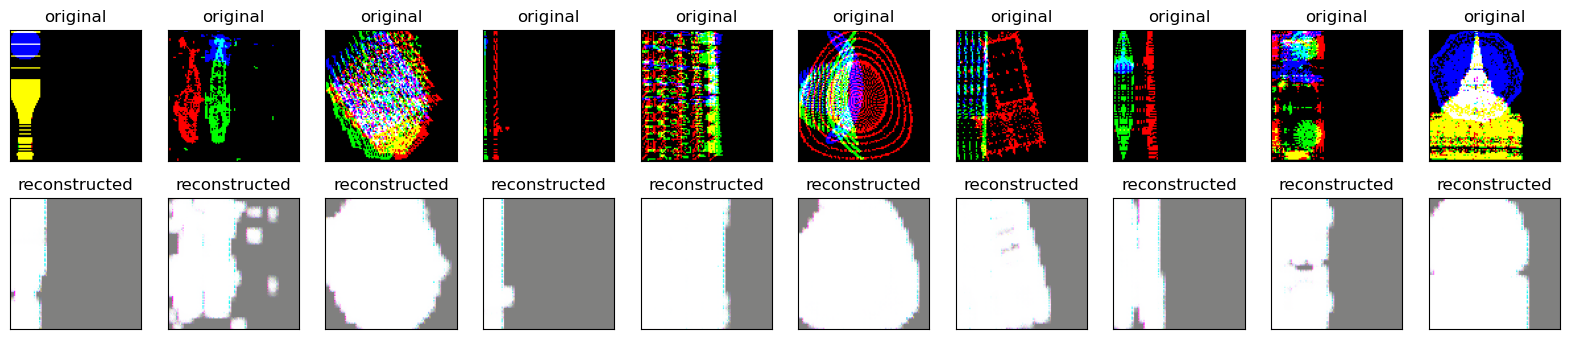

In [23]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(X_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [24]:
totalpreds = autoencoder.encoder.predict(X).reshape(len(X),6250)
distances = []
for index in range(len(totalpreds)):
    # index = 845
    query_object = totalpreds[index]
    print("True label: ", y[index])
    # Calculate distances using Euclidean distance as an example
    # distances.append(np.linalg.norm(totalpreds - query_object, axis=1))
    # from scipy.spatial.distance import cosine
    # distances.append(np.array([cosine(pred, query_object) for pred in totalpreds]))
    distances.append(np.sum(np.abs(totalpreds - query_object), axis=1))

78/78 [==============================] - 0s 5ms/step
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  AircraftBuoyant
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment
True label:  Apartment


In [25]:
totalpreds = autoencoder.encoder.predict(X[:,:,:,0]).reshape(len(X[:,:,:,0]),6250)
distances = []
for index in range(len(totalpreds)):
    # index = 845
    query_object = totalpreds[index]
    print("True label: ", y[index])
    # Calculate distances using Euclidean distance as an example
    # distances.append(np.linalg.norm(totalpreds - query_object, axis=1))
    # from scipy.spatial.distance import cosine
    # distances.append(np.array([cosine(pred, query_object) for pred in totalpreds]))
    distances.append(np.sum(np.abs(totalpreds - query_object), axis=1))

: 

In [ ]:
distancesnp = np.array(distances)

In [ ]:
import numpy as np
topk = 10
# Assuming distancesnp is your numpy array
# Set the diagonal elements to infinity as they are 0 (distance of an element to itself)
# np.fill_diagonal(distancesnp, np.inf)

# Get the indices of the smallest 10 elements in each row
indices = np.argpartition(distancesnp, topk+1, axis=1)[:, :topk+1]
smallest_distances = np.partition(distancesnp, topk+1, axis=1)[:, :topk+1]
# Sort the indices by corresponding distances
indices_sorted_by_distance = np.array([row[indices[i].argsort()] for i, row in enumerate(distancesnp)])
sorted_indices = np.array([idx_row[dist_row.argsort()] for idx_row, dist_row in zip(indices, smallest_distances)])
# Get the smallest 10 elements in each row and sort them
smallest_distances_sorted = np.sort(np.partition(distancesnp, topk+1, axis=1)[:, :topk+1])
smallest_distances_sorted

array([[     0.    , 126063.21  , 210728.19  , ..., 229001.1   ,
        231078.39  , 232788.33  ],
       [     0.    , 126063.21  , 219081.97  , ..., 242058.92  ,
        244538.64  , 246511.84  ],
       [     0.    , 123651.08  , 127673.34  , ..., 134818.75  ,
        135296.6   , 135502.58  ],
       ...,
       [     0.    , 125087.766 , 125773.06  , ..., 136498.86  ,
        136591.08  , 137278.77  ],
       [     0.    ,    625.9153,  49317.727 , ..., 104939.45  ,
        105028.98  , 105140.695 ],
       [     0.    , 148859.28  , 153810.1   , ..., 165051.33  ,
        165101.81  , 165350.36  ]], dtype=float32)

In [ ]:
y_np = y.to_numpy()

In [ ]:
top_k_classes = y_np[sorted_indices]

In [ ]:
trueclass_repeated = np.repeat(top_k_classes[:,0][:, np.newaxis], topk, axis=1)

In [ ]:

def obj_count_for_class(objclass):  # Count the number of objects per class
    classes, classcounts = np.unique(y_np, return_counts=True)
    return classcounts[classes == objclass][0]

In [ ]:
obj_count_for_class("AircraftBuoyant")

16

In [ ]:
# Initialize a dictionary to hold TP, FP, FN, TN for each class
class_metrics = {cls: {'TP': 0, 'FP': 0, 'FN': 0, 'TN': 0} for cls in np.unique(y_np)}

# Calculate TP, FP, FN, TN for each class
for item, trueclass in zip(ress, y_np):
    
    # for cls, metrics in class_metrics.items():
        
    class_metrics[trueclass]['TP'] += np.sum(item)
    class_metrics[trueclass]['FP'] += topk - np.sum(item)

    class_metrics[trueclass]['FN'] += obj_count_for_class(trueclass) - np.sum(item)
    class_metrics[trueclass]['TN'] += len(y_np) - topk - (obj_count_for_class(trueclass) - np.sum(item))

In [ ]:
import matplotlib.pyplot as plt

# Initialize dictionaries to hold precision, recall, F1 score, accuracy for each class
class_precision = {}
class_recall = {}
class_f1 = {}
class_accuracy = {}
class_sensitivity = {}
class_specificity = {}

# Calculate precision, recall, F1 score, accuracy for each class
for cls, metrics in class_metrics.items():
    TP = metrics['TP']
    FP = metrics['FP']
    FN = metrics['FN']
    TN = metrics['TN']
    
    class_precision[cls] = TP / (TP + FP) if TP + FP > 0 else 0
    class_recall[cls] = TP / (TP + FN) if TP + FN > 0 else 0
    class_f1[cls] = 2 * (class_precision[cls] * class_recall[cls]) / (class_precision[cls] + class_recall[cls]) if class_precision[cls] + class_recall[cls] > 0 else 0
    class_accuracy[cls] = (TP + TN) / (TP + FP + FN + TN)
    class_sensitivity[cls] = TP / (TP + FN) if TP + FN > 0 else 0
    class_specificity[cls] = TN / (TN + FP) if TN + FP > 0 else 0


In [ ]:
class_metrics

{'AircraftBuoyant': {'TP': 18, 'FP': 142, 'FN': 238, 'TN': 39074},
 'Apartment': {'TP': 7, 'FP': 223, 'FN': 522, 'TN': 55989},
 'AquaticAnimal': {'TP': 76, 'FP': 214, 'FN': 765, 'TN': 70488},
 'Bed': {'TP': 63, 'FP': 207, 'FN': 666, 'TN': 65673},
 'Bicycle': {'TP': 95, 'FP': 165, 'FN': 581, 'TN': 63301},
 'Biplane': {'TP': 180, 'FP': 270, 'FN': 1845, 'TN': 108720},
 'Bird': {'TP': 68, 'FP': 372, 'FN': 1868, 'TN': 106240},
 'Bookset': {'TP': 27, 'FP': 173, 'FN': 373, 'TN': 48767},
 'Bottle': {'TP': 128, 'FP': 182, 'FN': 833, 'TN': 75334},
 'BuildingNonResidential': {'TP': 17, 'FP': 423, 'FN': 1919, 'TN': 106189},
 'Bus': {'TP': 37, 'FP': 163, 'FN': 363, 'TN': 48777},
 'Car': {'TP': 539, 'FP': 351, 'FN': 7382, 'TN': 211291},
 'Cellphone': {'TP': 29, 'FP': 171, 'FN': 371, 'TN': 48769},
 'Chess': {'TP': 273, 'FP': 147, 'FN': 1491, 'TN': 101703},
 'City': {'TP': 41, 'FP': 229, 'FN': 688, 'TN': 65651},
 'ClassicPiano': {'TP': 32, 'FP': 168, 'FN': 368, 'TN': 48772},
 'Computer': {'TP': 42, 'F

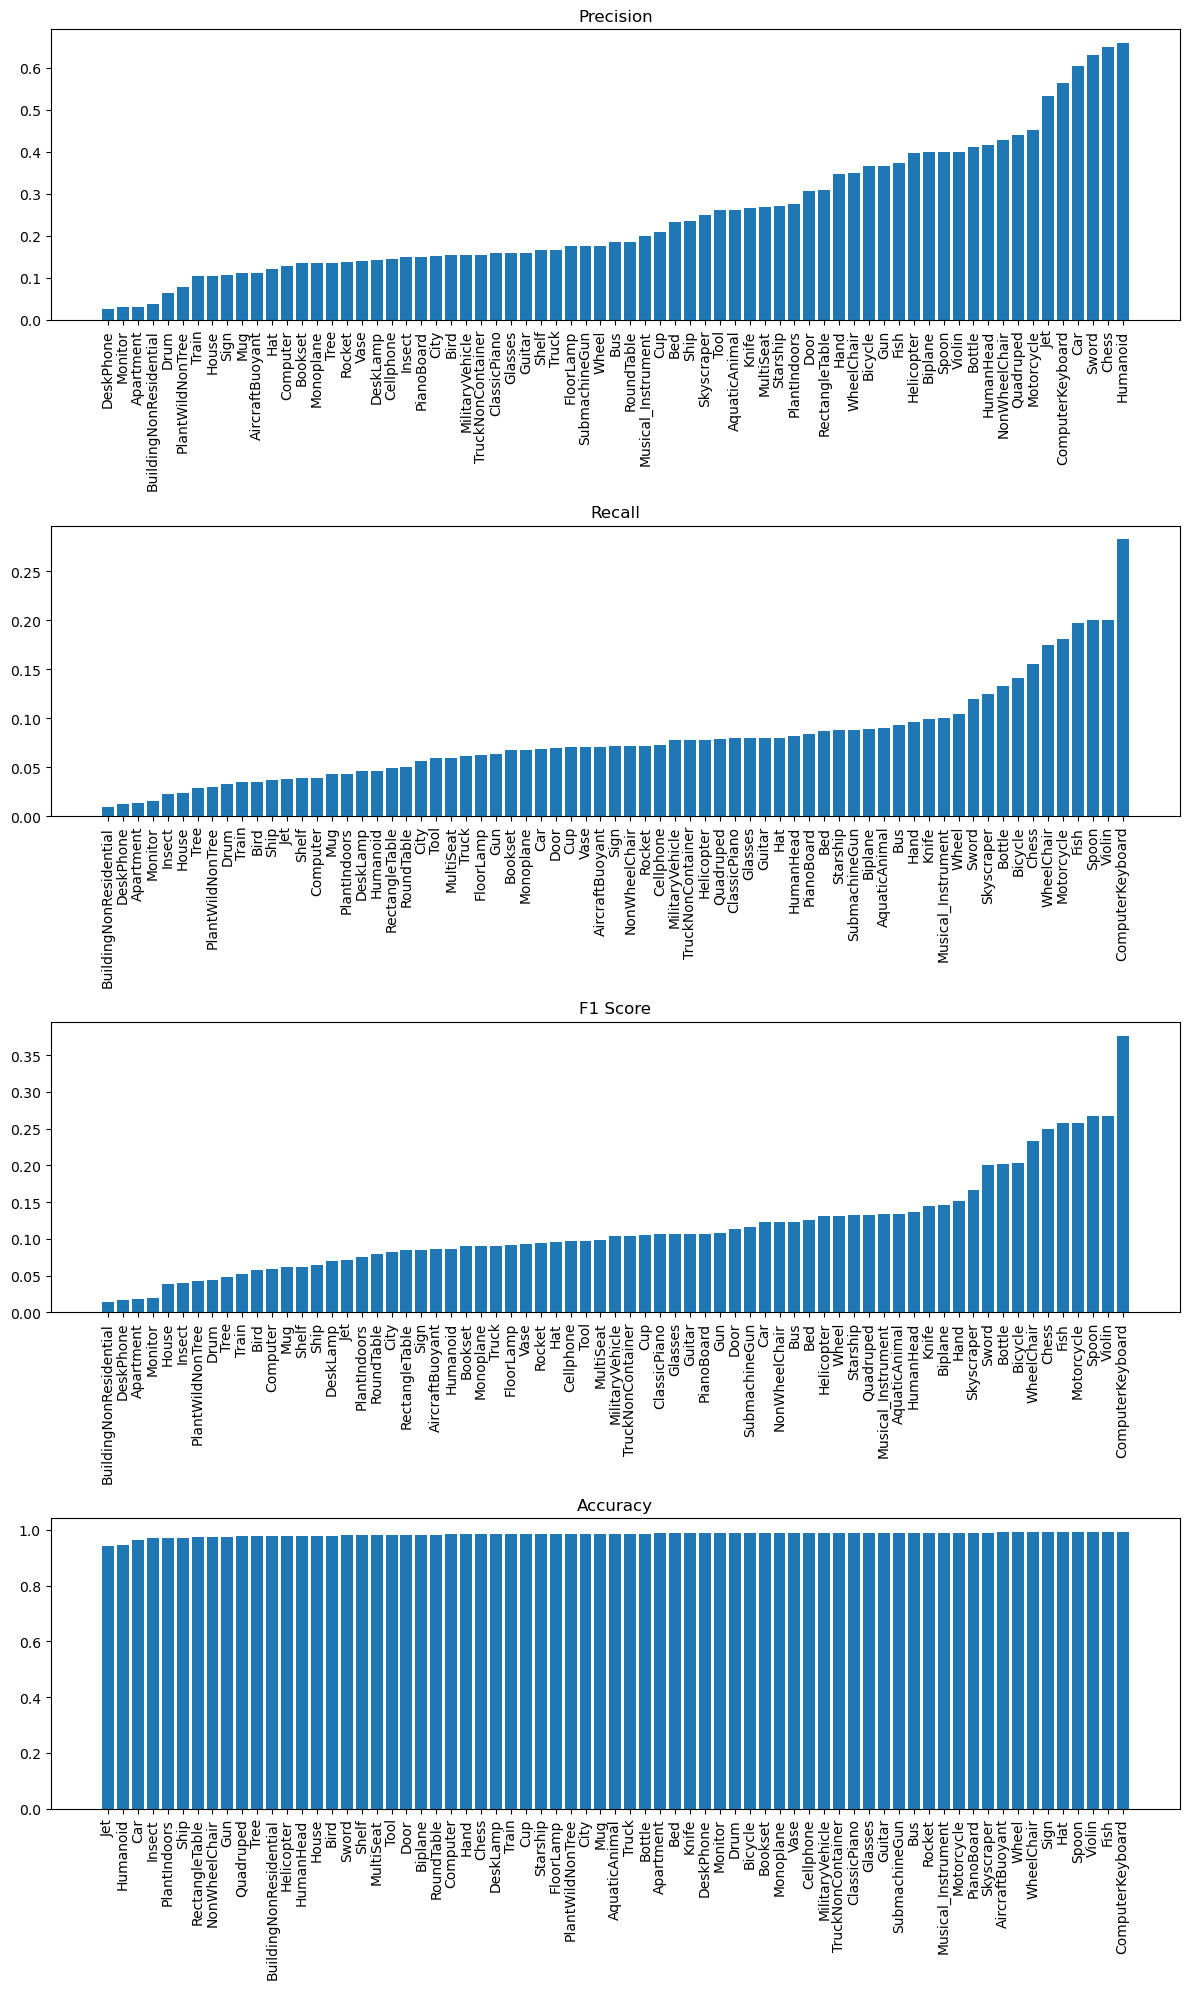

In [ ]:
# Create separate plots for precision, recall, F1 score, accuracy
fig, axs = plt.subplots(4, figsize=(12, 20))

# Sort classes by precision and plot
sorted_classes = sorted(class_precision, key=class_precision.get)
axs[0].bar(sorted_classes, [class_precision[cls] for cls in sorted_classes])
axs[0].set_title('Precision')

# Sort classes by recall and plot
sorted_classes = sorted(class_recall, key=class_recall.get)
axs[1].bar(sorted_classes, [class_recall[cls] for cls in sorted_classes])
axs[1].set_title('Recall')

# Sort classes by F1 score and plot
sorted_classes = sorted(class_f1, key=class_f1.get)
axs[2].bar(sorted_classes, [class_f1[cls] for cls in sorted_classes])
axs[2].set_title('F1 Score')

# Sort classes by accuracy and plot
sorted_classes = sorted(class_accuracy, key=class_accuracy.get)
axs[3].bar(sorted_classes, [class_accuracy[cls] for cls in sorted_classes])
axs[3].set_title('Accuracy')

# Rotate x-axis labels for readability
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Calculate overall average precision, recall, F1 score, sensitivity, specificity, accuracy
avg_precision = np.mean(list(class_precision.values()))
avg_recall = np.mean(list(class_recall.values()))
avg_f1 = np.mean(list(class_f1.values()))

# Calculate overall average sensitivity and specificity
avg_sensitivity = np.mean(list(class_sensitivity.values()))
avg_specificity = np.mean(list(class_specificity.values()))

avg_accuracy = np.mean(list(class_accuracy.values()))

print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Sensitivity: {avg_sensitivity}')
print(f'Average Specificity: {avg_specificity}')
print(f'Average Accuracy: {avg_accuracy}')


Average Precision: 0.24921009929402715
Average Recall: 0.07907822089534688
Average F1 Score: 0.1147731328356647
Average Sensitivity: 0.07907822089534688
Average Specificity: 0.9969152475926226
Average Accuracy: 0.9834740895003952
